# Predictive analysis of Bank Marketing

#### Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

#### What to achieve?
The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Contains information in following format:

### Categorical Variable :

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* Default - (Yes/No)

### Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

#### Class
* deposit - (Yes/No)

In [123]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#Importing and displaying data
data = pd.read_csv("../data/raw/bank.csv", delimiter=";",header='infer')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [125]:
data['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [126]:
#4521 rows and 17 features
data.shape

(4521, 17)

In [127]:
#datatypes of the columns
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Since the dtype contains types other than int, floot; we need to convert those column values into proper format in order to fit the data in model.

In [129]:
#Converting object type data into numeric type using One-Hot encoding method which is
#majorly used for XGBoost (for better accuracy) [Applicable only for non numeric categorical features]
'''
data_new = pd.get_dummies(data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact',
                                         'poutcome'])
'''
data_new = pd.get_dummies(data, columns=['job','marital',
                                         'education', 'contact',
                                         'poutcome'])

boolean_cols = ['default', 'housing', 'loan']
#data_new[boolean_cols] = data_new[boolean_cols].applymap(lambda x: True if x == 'yes' else False)
data_new[boolean_cols] = data_new[boolean_cols].applymap(lambda x: True if x == 1 else 0)
data_new['month'] = data_new['month'].map({'jan': 1, 'feb': 3, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                                           'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
#pd is instance of pandas. Using get_dummies method we can directly convert any type of data into One-Hot encoded format.

C:\Users\manni\AppData\Local\Temp\ipykernel_26152\1684158787.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_new[boolean_cols] = data_new[boolean_cols].applymap(lambda x: True if x == 1 else 0)


In [130]:
#Since y is a class variable we will have to convert it into binary format. (Since 2 unique class values)
data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [131]:
#Checking types of all the columns converted
data_new.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.              bool
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_divorced        bool
marital_married         bool
marital_single          bool
education_primary       bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
contact_cellular        bool
contact_telephone       bool
contact_unknown         bool
poutcome_failu

In [132]:
#Our New dataframe ready for XGBoost
data_new.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,10,79,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,33,0,4789,0,0,11,5,220,1,339,...,True,False,False,True,False,False,True,False,False,False
2,35,0,1350,0,0,16,4,185,1,330,...,False,True,False,True,False,False,True,False,False,False
3,30,0,1476,0,0,3,6,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0,0,0,0,5,5,226,1,-1,...,True,False,False,False,False,True,False,False,False,True


In [133]:
#Spliting data as X -> features and y -> class variable
data_y = pd.DataFrame(data_new['y'])
data_X = data_new.drop(['y'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')
Index(['y'], dtype='object')


In [134]:
#Dividing records in training and testing sets along with its shape (rows, cols)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3164, 37)
(1357, 37)
(3164, 1)
(1357, 1)


In [135]:
#Create an XGB classifier and train it on 70% of the data set.
from sklearn import svm
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42)
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [136]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [137]:
y_pred = clf.predict(X_test)

In [138]:
#classification accuracy
from sklearn import metrics

def print_metrics(y_test, y_pred):
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(metrics.classification_report (y_test, y_pred))
    print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

print_metrics(y_test, y_pred)

Accuracy: 0.894620486366986
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1201
           1       0.57      0.33      0.42       156

    accuracy                           0.89      1357
   macro avg       0.75      0.65      0.68      1357
weighted avg       0.88      0.89      0.88      1357

AUC: 0.6476413885864343


**Using xgb Library**

In [29]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [30]:
#Train the model
params = {
    'objective':'multi:softprob',
    'max_dept':4,
    'silent':1,
    'eta':0.3,
    'gamma': 0,
    'num_class': 2
}
num_rounds=20

In [31]:
XGB_Model = xgb.train(params,dtrain,num_rounds)

d:\CondaEnv\py4dp\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_dept", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
XGB_Model.dump_model('dump.rawBank.txt')

In [33]:
y_predict = XGB_Model.predict(dtest)
#print(y_predict)

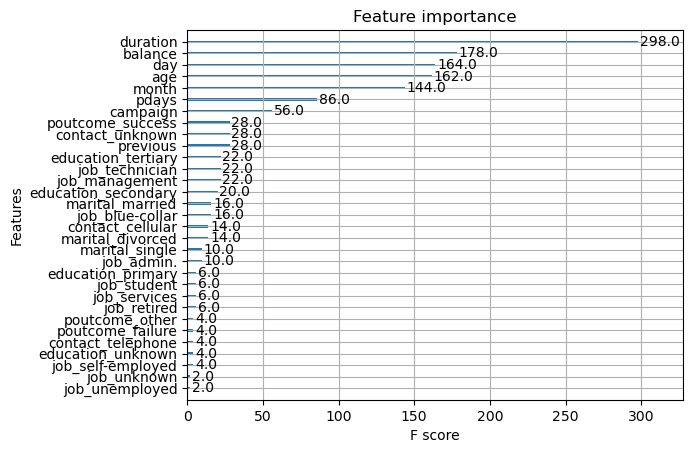

In [34]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(XGB_Model)
pyplot.show()

In [55]:
XGB_Model.feature_names
features  = pd.DataFrame.from_dict(XGB_Model.get_score(), orient='index')
features.columns = ['score']
features = features.sort_values('score', ascending=False)
features = features[features['score'] > 25]
features

,score
duration,298.0
balance,178.0
day,164.0
age,162.0
month,144.0
pdays,86.0
campaign,56.0
contact_unknown,28.0
poutcome_success,28.0
previous,28.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_X[features.index], data_y, test_size=0.3, random_state=2, stratify=data_y)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.89240972733972
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1201
           1       0.55      0.33      0.41       156

    accuracy                           0.89      1357
   macro avg       0.74      0.65      0.68      1357
weighted avg       0.88      0.89      0.88      1357

AUC: 0.6463924293857682


In [139]:
import shap

X_train, X_test, y_train, y_test = train_test_split(data_X.replace({True: 1, False: 0}), data_y, test_size=0.3, random_state=2, stratify=data_y)


explainer  = shap.Explainer(clf, X_train) 

shap_values = explainer(X_test)

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df = shap_df.abs().mean().reset_index()
shap_df.columns = ['Feature', 'Score']
shap_df = shap_df.sort_values('Score', ascending=False)
shap_features = shap_df[shap_df['Score'] > 0.1]['Feature'].to_list()
shap_features

['duration',
 'contact_unknown',
 'month',
 'balance',
 'day',
 'campaign',
 'age',
 'poutcome_success',
 'pdays',
 'previous',
 'contact_cellular',
 'education_tertiary',
 'job_blue-collar',
 'marital_married']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data_X[shap_features], data_y, test_size=0.3, random_state=2, stratify=data_y)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.8960943257184967
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1201
           1       0.58      0.36      0.44       156

    accuracy                           0.90      1357
   macro avg       0.75      0.66      0.69      1357
weighted avg       0.88      0.90      0.89      1357

AUC: 0.6624180704114093


In [143]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)

pca = PCA(n_components='mle')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.887988209285188
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1201
           1       0.52      0.29      0.38       156

    accuracy                           0.89      1357
   macro avg       0.72      0.63      0.66      1357
weighted avg       0.87      0.89      0.87      1357

AUC: 0.6299504686265719


In [144]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_X, data_y)

'''
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(data_X, data_y)
'''

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)


Accuracy: 0.94625
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       801
           1       0.96      0.93      0.95       799

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

AUC: 0.9462311659861968


In [145]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train, y_train, cv=kfold)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.94625
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       801
           1       0.96      0.93      0.95       799

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

AUC: 0.9462311659861968
